In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
# load the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/fabio/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-7 Python-3.10.9 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
# just a random image from the internet
img = 'https://media.cnn.com/api/v1/images/stellar/prod/180315153021-colombia-medellin-houses.jpg?q=w_4240,h_2832,x_0,y_0,c_fill/w_1280'  # or file, Path, PIL, OpenCV, numpy, list

In [4]:
# get and print results
result = model(img)
result

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 855x1280 10 persons, 1 motorcycle, 1 umbrella, 1 dining table
Speed: 256.6ms pre-process, 74.6ms inference, 0.8ms NMS per image at shape (1, 3, 448, 640)

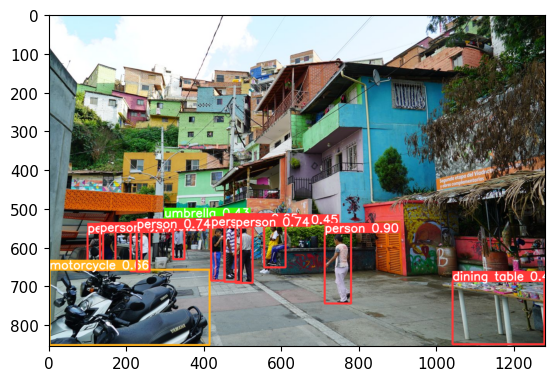

In [5]:
# plot the results with maplotlib
%matplotlib inline
plt.imshow(result.render()[0])
plt.show()

*Extract frames from a mp4 video to get multiple images for training*

In [7]:
import os
from uuid import uuid4
import time

# define the path of the images
imgs_path = './images'

# get the video
video = cv2.VideoCapture('video.mp4')
while video.isOpened():

    # read the frames from video
    ret, frames = video.read()

    # snapshot the frames and store it in the images folder
    decision = np.random.rand()
    if decision > 0.95:
        cv2.imwrite(os.path.join(imgs_path, f'{str(uuid4())}.jpg'), frames)

    # shows the video
    cv2.imshow('video', frames)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


The following is to train the model, based on the tutorial.

In [12]:
!cd yolov5 && python train.py --rec --batch 16 --epochs 25 --data blueylilo.yaml --weights yolov5s.pt --workers 6

train: weights=yolov5s.pt, cfg=, data=blueylilo.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=True, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=6, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.10.9 torch-2.0.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s